%pylab inline
%config InlineBackend.figure_formats = ['svg']

# A Brief Overview of Python

## Python …

- general-purpose programming language
- extremely portable
- interpreted (i.e. no compilation stage)
- supports multiple paradigms: object-oriented, structured, …
- dynamic and strong typing
- free software
- huge selection of free extensions (including many scientific packages)
- can be used for high-level scripting of numerical  codes (e.g. C/Fortran)
![Python logo](https://www.python.org/static/community_logos/python-logo-generic.svg)

## Hello World

In [2]:
print("Hello World!")

Hello World!


## How to get it

- distribution packages<br/>
  Debian/Ubuntu: `python3`, `python3-numpy`, `python3-matplotlib`, `ipython`, …
- official Python package manager `pip` also works without root access
- third-party package: [Anaconda](https://www.continuum.io/downloads) (Linux, OS X, Windows)
- compile it yourself
- …

## Syntax by Examples

In [3]:
a = 5
b = 16
if a > b:
    # White space is significant.
    # Indentation is used to signify code blocks.
    c = "Yes"
else:
    c = "No"

print("Is a greater than b?", c)

Is a greater than b? No


In [4]:
def iseven(x):
    """Returns True when x is even."""
    return x % 2 == 0

for a in range(10):
    if iseven(a):
        print(a, " is even.")
    else:
        print(a, " is odd.")

0  is even.
1  is odd.
2  is even.
3  is odd.
4  is even.
5  is odd.
6  is even.
7  is odd.
8  is even.
9  is odd.


# Mathematical Types and Operations

In [5]:
# integers
i = 15
j = 7
k = 0xff # same as 255
# floating-point numbers
a = 1.0 / sqrt(2.0)
b = 1e20
# complex numbers
c = a + 1j * a

In [6]:
# division of integers always results in floats (was different in Python 2)
i / j

2.142857142857143

In [7]:
# explicit integer division
i // j

2

In [8]:
# ** is the power operator
c**2

0.99999999999999978j

### Some Data Structures

In [9]:
# Lists can store objects of different types. Index starts at 0.
things = [42, "a string", ["another", "list"]]

In [10]:
things[2][1]

'list'

In [11]:
# Sets are like lists but without ordering.
birds = {'seagull', 'crane', 'crow'}
machines = {'car', 'computer', 'crane'}

In [12]:
birds

{'crane', 'crow', 'seagull'}

In [13]:
birds.intersection(machines)

{'crane'}

In [14]:
# Dictionaries store key-value pairs
sirius_a = dict(magnitude=1.42, parallax=379.21)
sirius_a['mass'] = 2.02 * 1.9891e+33

In [15]:
for k, v in sirius_a.items():
    # Loops can directly iterate of key-value pairs
    print("%s is %0.5e." % (k.capitalize(), v))
    # printf-style string formatting is supported.

Mass is 4.01798e+33.
Parallax is 3.79210e+02.
Magnitude is 1.42000e+00.


## Numerics with Python

In [16]:
def simpledot(x, y):
    """Computes the dot product of x and y."""
    d = 0.0
    for i in range(len(x)):
        d += x[i] * y[i]
    return d

a = list(range(5000,10000))
b = list(range(-50,4950))
%timeit simpledot(a, b)

1000 loops, best of 3: 998 µs per loop


Straightforward usage of lists is extremely inefficient due to type-checking and storage overhead.
Remember lists support a mixture of types.

## Numpy

A Python package featuring a multidimensional array object (`ndarray`). Operations on these objects are implemented using C.

In [17]:
import numpy as np
a = np.array(range(5000,10000)) # or simply np.arange(5000,10000)
b = np.array(range(5000,10000))
np.dot(a,b)
%timeit np.dot(a,b)

The slowest run took 5.20 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.71 µs per loop


In [18]:
A = np.array([[1,2,3],[0,5,20],[21,22,23]])
A

array([[ 1,  2,  3],
       [ 0,  5, 20],
       [21, 22, 23]])

In [19]:
# selecting array slices
A[:,1]

array([ 2,  5, 22])

In [20]:
# array operations always act element-wise
print(A * A)
print(2 * A + 1)

[[  1   4   9]
 [  0  25 400]
 [441 484 529]]
[[ 3  5  7]
 [ 1 11 41]
 [43 45 47]]


In [21]:
# linear algebra operations
Ai = np.linalg.inv(A)
# Converting to the matrix type redefines the product
# to the matrix product.
np.matrix(Ai) * np.matrix(A)

matrix([[  1.00000000e+00,   4.44089210e-16,   0.00000000e+00],
        [  0.00000000e+00,   1.00000000e+00,  -1.33226763e-15],
        [ -1.11022302e-16,   1.11022302e-16,   1.00000000e+00]])

## Plotting

`matplotlib` offers a wide range of plotting functions. Labels can be rendered using $\mathrm{\LaTeX}$.
It can display the plots in a window, in a brower-based Notebook, or save it in a variety of formats (PDF, PNG, …).

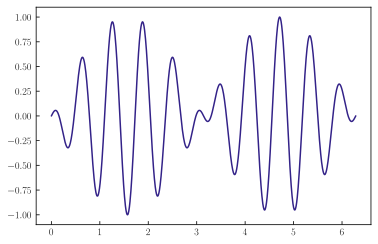

In [22]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi, 1000)
plt.plot(x, np.sin(x) * np.cos(10 * x))

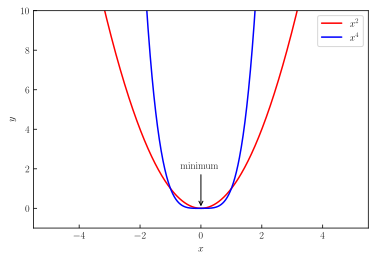

In [23]:
# When running in pylab mode, a default selection of functions is imported.
x = linspace(-5, 5, 1000)
plot(x, x**2, color='red', label="$x^2$") # Labels are used for creating a legend.
plot(x, x**4, color='blue', label="$x^4$")
ylim(-1,10)
legend(loc='best')
xlabel('$x$')
ylabel('$y$')
annotate('minimum',(0,0), xytext=(0,2), horizontalalignment='center',
         arrowprops=dict(arrowstyle='->'))

### Plots of 2D Data

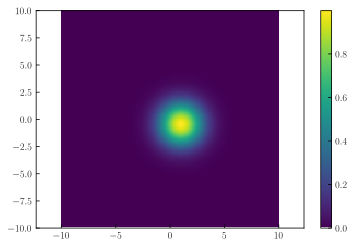

In [24]:
X, Y = meshgrid(linspace(-10,10,200),linspace(-10,10,200))
X0, Y0 = 1., -0.5
W = 2.
data = exp(-((X-X0)**2 + (Y-Y0)**2)/W**2)
pcolormesh(X,Y,data,rasterized=True, cmap='viridis')
axis('equal')
colorbar()

### 3D Surface Plots
`matplotlib` has rudimentary support for 3D plots. More advanced functions are availabe in packages like `mayavi` and `yt`.

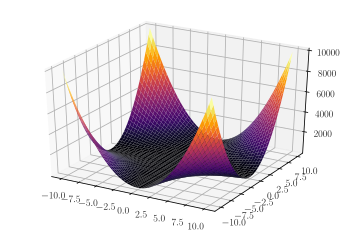

In [25]:
import mpl_toolkits.mplot3d
ax = subplot(111, projection='3d')
ax.plot_surface(X, Y, X**2 * Y**2, cmap='inferno')

/home/tux/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in power
  app.launch_new_instance()


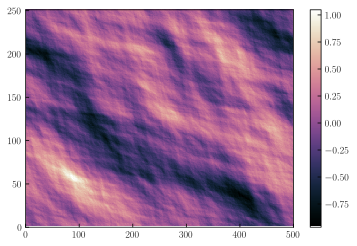

In [26]:
kx, ky = meshgrid(rfftfreq(500), rfftfreq(500))
k = sqrt(kx**2 + ky**2)
D = k**(-5./3.) * exp(2j * pi * rand(*kx.shape))
D[0,:] = 0
D[:,0] = 0
E=irfft2(D)
pcolormesh(E, rasterized=True)
colorbar()

### Animations

Plots with changing parameters can be automatically rendered to a video file

In [35]:
# example from http://matplotlib.org/examples/animation/simple_anim.html
from matplotlib import rc, animation
rc('animation', html='html5')
fig, ax = plt.subplots()
x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))
def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,
ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), interval=25)
close(fig)
ani

## IPython/Jupyter

- IPython is a convenient interactive shell for Python
- renamed to Jupyter in 2014 as support for new languages (Ruby, R, Julia, …) was added
- browser-based notebook interface to store description, code, and results in one file
- notebooks can be exported to HTML, PDF, markdown, LaTeX, slides and shared with collaborators
- compute kernel can run on different machine (even multiple kernels in batch queue)
- Jupyterhub offers web-based remote access to notebooks and kernels (e.g. for homework assignments)

### Example Notebook

this presentation

## Computer Algebra

Symbolic manipulations can carried out using the `sympy` package.

In [28]:
from sympy import *
init_printing()
a, x = var('a, x')
f = cos(a*x**2)
f.diff(x)

In [29]:
N(pi,1000)

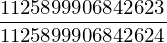

In [30]:
n = var('n')
summation(1/2**n,(n,1,50))

In [31]:
N(summation(1/2**n,(n,1,30)))

In [32]:
summation(1/2**n,(n,1,inf))

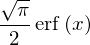

In [33]:
integrate(exp(-x**2))

In [34]:
integrate(exp(-x**2),(x,-inf,inf))